In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import Sequence
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import time
import os
from sklearn import metrics

pd.set_option('display.float_format',lambda x: '%.4f' %x)
import seaborn as sns
sns.set_context('paper',font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller

from keras.layers import *
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns # plotting library
from sklearn import svm
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/household_power_consumption.txt',delimiter=';')

df=df.loc[:,['Global_active_power']]
df

,Global_active_power
0,4.216
1,5.360
2,5.374
3,5.388
4,3.666
...,...
2075254,0.9460
2075255,0.9440
2075256,0.9380
2075257,0.9340


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


NN çalıştırmak için bunnları run etme


In [ ]:
# Convert features for better analysis
df['date_time']=pd.to_datetime(df['Date']+' '+df['Time'])
df['Global_active_power']=pd.to_numeric(df['Global_active_power'],errors='coerce')
df=df.dropna(subset=['Global_active_power'])

df['date_time']=pd.to_datetime(df['date_time'])
df=df.loc[:,['date_time','Global_active_power']]
df.sort_values('date_time',inplace=True,ascending=True)
df=df.reset_index(drop=True)

In [ ]:
df['year']=df['date_time'].apply(lambda x:x.year)
df['quarter']=df['date_time'].apply(lambda  x:x.quarter)
df['month']=df['date_time'].apply(lambda x:x.month)
df['day']=df['date_time'].apply(lambda x:x.day)
df=df.loc[:,['date_time','Global_active_power','year','quarter','month','day']]
df.sort_values('date_time',inplace=True,ascending=True)
df=df.reset_index(drop=True)
df['weekday']=df.apply(lambda row : row['date_time'].weekday(),axis=1)
df["weekday"]=(df['weekday']<5).astype(int)


print('Number of rows and columns after removing missing values:',df.shape)
print('The time series starts from:',df['date_time'].min())
print('The time series ends on:',df['date_time'].max())

Number of rows and columns after removing missing values: (2049280, 7)
The time series starts from: 2006-12-16 17:24:00
The time series ends on: 2010-12-11 23:59:00


In [ ]:
df['Global_active_power']=pd.to_numeric(df['Global_active_power'],errors='coerce')

dataset=df.Global_active_power.values
dataset=dataset.astype('float32')
dataset=np.reshape(dataset,(-1,1))
scaler=MinMaxScaler(feature_range=(0,1))
dataset=scaler.fit_transform(dataset)
train_size=int(len(dataset)*0.8)
test_size=len(dataset)-train_size
train,test =dataset[0:train_size,:],dataset[train_size:len(dataset),:]

In [ ]:

def create_dataset(dataset, look_back=1):
  x,y=[],[]
  for i in range(len(dataset)-look_back-1):
    a=dataset[i:(i+look_back),0]
    x.append(a)
    y.append(dataset[i+look_back,0])
  return np.array(x),np.array(y)



In [ ]:
look_back=30

x_train,y_train=create_dataset(train,look_back)
x_test,y_test=create_dataset(test,look_back)

# Reshape inputs
x_train= np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

#print(x_train)
#print(y_train)
#print(x_test)
#print(y_test)

In [ ]:
df=df.replace([np.inf, -np.inf], np.nan).fillna(99999)

In [ ]:
a = df[ 0:int(.01*len(df))]

b = df[ int(.99*len(df)): -1]

#np.split(df, [int(.7*len(df)), int(len(df))])

In [ ]:
a

,Global_active_power
0,4.2160
1,5.3600
2,5.3740
3,5.3880
4,3.6660
...,...
20747,1.1640
20748,0.3940
20749,0.3900
20750,0.3880


In [ ]:
b

,Global_active_power
2054506,1.4680
2054507,1.4100
2054508,1.2940
2054509,1.3020
2054510,1.3940
...,...
2075253,0.9460
2075254,0.9460
2075255,0.9440
2075256,0.9380


NEURAL NETWORK


In [ ]:


x_train, x_test, y_train, y_test=train_test_split(a,b, test_size=0.3, random_state=42)


# Control missing values
x_train.isna().sum()
x_test.isna().sum()
y_train.isna().sum()
y_test.isna().sum()

# Drop missing values
x_train = x_train.dropna()
x_test = x_test.dropna()
y_train = y_train.dropna()
y_test = y_test.dropna()




model = Sequential()
model.add(Dense(3, input_shape=(1,), activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='sgd')
history=model.fit(x_train, y_train, epochs=50, batch_size=4, verbose=2, validation_split = 0.3, shuffle=False)



model.summary()


Epoch 1/50
2542/2542 - 7s - loss: 397140644465435738112.0000 - val_loss: 0.9654 - 7s/epoch - 3ms/step
Epoch 2/50
2542/2542 - 4s - loss: 0.9120 - val_loss: 0.9654 - 4s/epoch - 2ms/step
Epoch 3/50
2542/2542 - 5s - loss: 0.9120 - val_loss: 0.9654 - 5s/epoch - 2ms/step
Epoch 4/50
2542/2542 - 4s - loss: 0.9120 - val_loss: 0.9654 - 4s/epoch - 2ms/step
Epoch 5/50
2542/2542 - 4s - loss: 0.9120 - val_loss: 0.9654 - 4s/epoch - 1ms/step
Epoch 6/50
2542/2542 - 5s - loss: 0.9120 - val_loss: 0.9654 - 5s/epoch - 2ms/step
Epoch 7/50
2542/2542 - 4s - loss: 0.9120 - val_loss: 0.9654 - 4s/epoch - 2ms/step
Epoch 8/50
2542/2542 - 4s - loss: 0.9120 - val_loss: 0.9654 - 4s/epoch - 2ms/step
Epoch 9/50
2542/2542 - 5s - loss: 0.9120 - val_loss: 0.9654 - 5s/epoch - 2ms/step
Epoch 10/50
2542/2542 - 4s - loss: 0.9120 - val_loss: 0.9654 - 4s/epoch - 2ms/step
Epoch 11/50
2542/2542 - 4s - loss: 0.9120 - val_loss: 0.9654 - 4s/epoch - 1ms/step
Epoch 12/50
2542/2542 - 4s - loss: 0.9120 - val_loss: 0.9654 - 4s/epoch - 2m

In [ ]:
yhat = model.predict(x_test)
error = mean_squared_error(y_test, yhat)


#print('MSE: %.3f' % error)

test_set_predictions = model.predict(x_test)

mae=metrics.mean_absolute_error(y_test, test_set_predictions)
mse=metrics.mean_squared_error(y_test, test_set_predictions)
r2=metrics.r2_score(y_test, test_set_predictions)
# Printing the metrics
print('Test R2 square:',r2)
print('Test MAE: ', mae)
print('Test MSE: ', mse)

train_set_predictions = model.predict(x_train)

print(y_train)
print(train_set_predictions)

mae=metrics.mean_absolute_error(y_train, train_set_predictions)
mse=metrics.mean_squared_error(y_train, train_set_predictions)
r2=metrics.r2_score(y_train, train_set_predictions)
# Printing the metrics
print('Train R2 square:',r2)
print('Train MAE: ', mae)
print('Train MSE: ', mse)

195/195 [==============================] - 0s 1ms/step
Test R2 square: -0.0014436592502671264
Test MAE:  0.7560007212669796
Test MSE:  0.9495089246492705
454/454 [==============================] - 1s 1ms/step
         Global_active_power
2072283               1.4940
2075020               0.6860
2063851               0.7980
2061871               0.3080
2066382               1.4740
...                      ...
2065790               3.5620
2066470               6.2660
2059896               0.2340
2055366               0.3780
2070301               1.5960

[14526 rows x 1 columns]
[[1.2246175]
 [1.2246175]
 [1.2246175]
 ...
 [1.2246175]
 [1.2246175]
 [1.2246175]]
Train R2 square: -0.0012634717494384162
Train MAE:  0.7566167323519404
Train MSE:  0.9273761036425755


In [ ]:
test_set_predictions

array([[1.2246175],
       [1.2246175],
       [1.2246175],
       ...,
       [1.2246175],
       [1.2246175],
       [1.2246175]], dtype=float32)

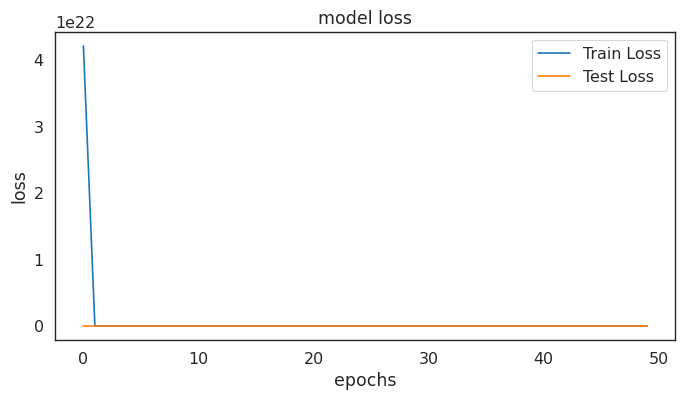

In [ ]:
#plot model losses
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

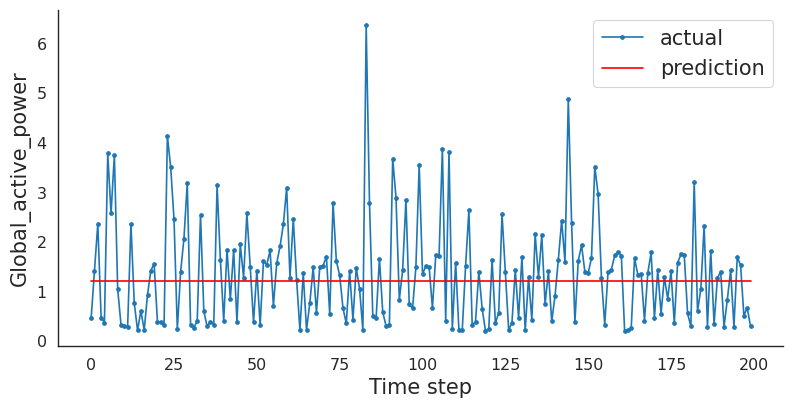

In [ ]:


aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[:][:200], marker='.', label="actual")
plt.plot(aa, test_set_predictions[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

SİMPLE ANN KAGGLE

https://www.kaggle.com/code/ruslantrifonov/simple-ann


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from functools import partial

In [ ]:
# READ DATA

data_path = '/content/drive/MyDrive/household_power_consumption.txt'

data = pd.read_csv(data_path, sep=';',
                   parse_dates={'data': ['Date', 'Time']},
                   infer_datetime_format=True,
                   na_values=['nan', '?'],
                   index_col='data')

data_head = data.head()
data_head

data_tail = data.tail()
data_tail

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
data,,,,,,,
2010-11-26 20:58:00,0.9460,0.0000,240.4300,4.0000,0.0000,0.0000,0.0000
2010-11-26 20:59:00,0.9440,0.0000,240.0000,4.0000,0.0000,0.0000,0.0000
2010-11-26 21:00:00,0.9380,0.0000,239.8200,3.8000,0.0000,0.0000,0.0000
2010-11-26 21:01:00,0.9340,0.0000,239.7000,3.8000,0.0000,0.0000,0.0000
2010-11-26 21:02:00,0.9320,0.0000,239.5500,3.8000,0.0000,0.0000,0.0000


In [ ]:
data_clear = data.dropna()

In [ ]:
# DATA PREPARATION

# Resampling of data over 30 minutes
data_resample = data_clear.resample('30Min').mean()
data_resample.shape

# Splitting into target variable and feathers
X = data_resample.drop("Global_active_power", axis=1)
X = X.reset_index(drop=True)
X.head()

y = data_resample["Global_active_power"].reset_index(drop=True)
y.head()

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Control missing values
X_train.isna().sum()
X_test.isna().sum()
y_train.isna().sum()
y_test.isna().sum()

# Drop missing values
X_train = X_train.dropna()
X_test = X_test.dropna()
y_train = y_train.dropna()
y_test = y_test.dropna()

(48423, 6)
(20754, 6)
(48423,)
(20754,)


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize X_train
X_train_norm = scaler.fit_transform(X_train)
#print(X_train.shape)

# Normalize X_test
X_test_norm = scaler.fit_transform(X_test)
#print(X_test.shape)

In [ ]:
def learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(20, 8))
    plt.grid(True)
    plt.title('Learning curves')
    plt.gca().set_ylim(0, 1)
    plt.show()


def evaluation_model(history):
    fig, (axL, axR) = plt.subplots(ncols=2, figsize=(20, 8))
    axL.plot(history.history['loss'], label="loss (mse) for training")
    axL.plot(history.history['val_loss'], label="loss (mse) for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

    axR.plot(history.history['mae'], label="mae for training")
    axR.plot(history.history['val_mae'], label="mae for validation")
    axR.set_title('model mae')
    axR.set_xlabel('epoch')
    axR.set_ylabel('mae')
    axR.legend(loc='upper right')

    plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                448       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
299/299 - 1s - loss: 0.8898 - mae: 0.7542 - val_loss: 0.8749 - val_mae: 0.7550 - 1s/epoch - 5ms/step
Epoch 2/10
299/299 - 1s - loss: 0.8691 - mae: 0.7442 - val_loss: 0.8547 - val_mae: 0.7458 - 709ms/epoch - 2ms/step
Epoch 3/10
299/299 - 1s - loss: 0.8442 - mae: 0.7304 - val_loss: 0.8246 - val_mae: 0.7226

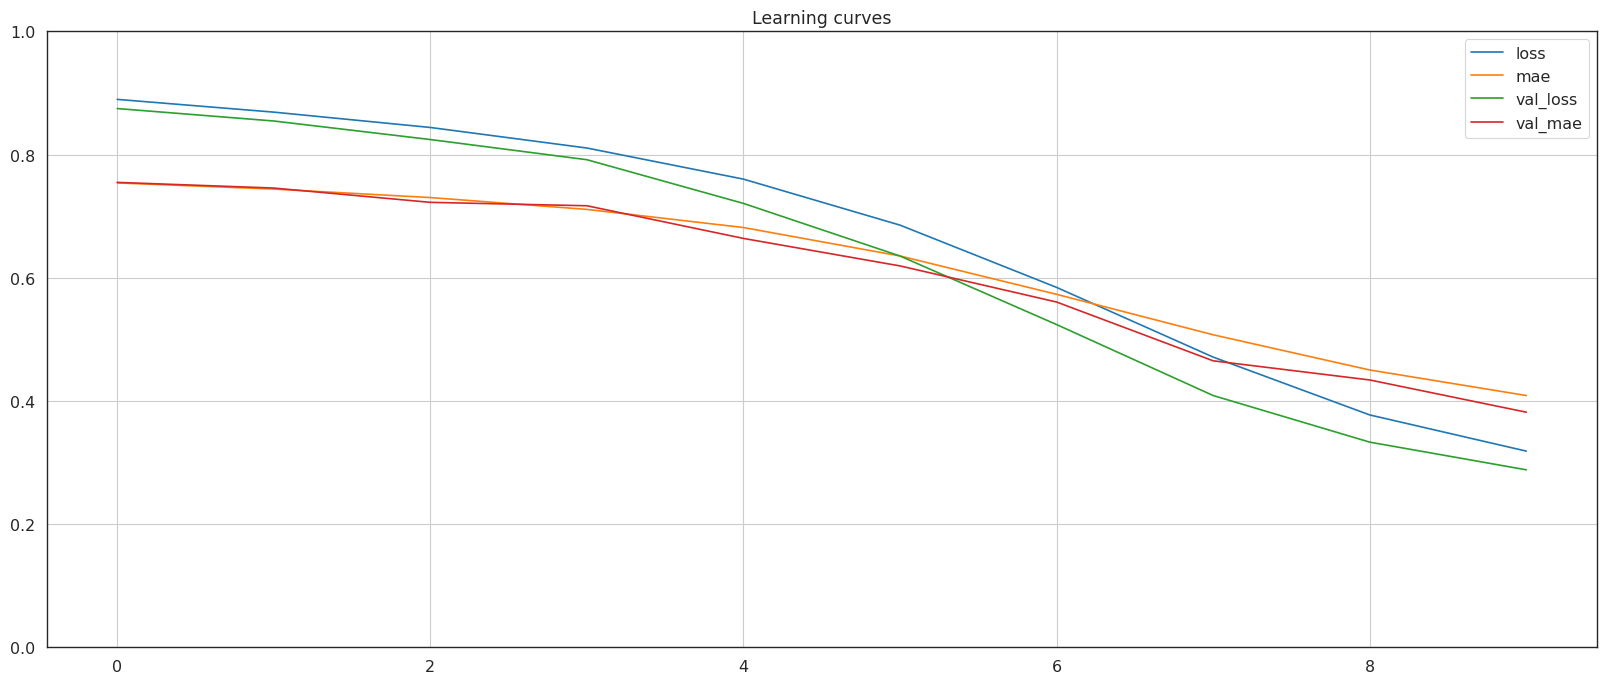

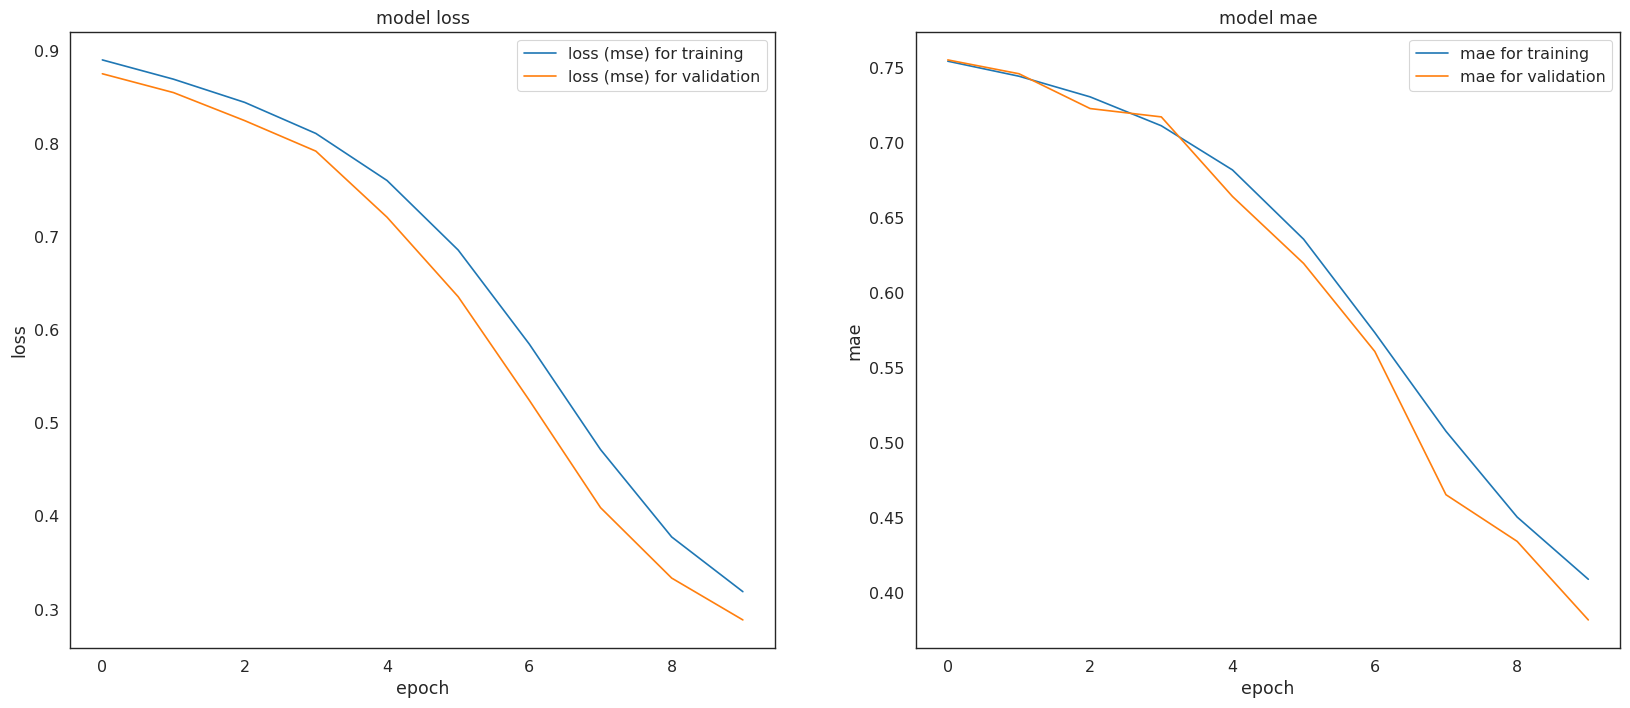

In [ ]:
model_1a = Sequential([
    Dense(64, activation='sigmoid', input_shape=(6,)), # input shape 6 ????
    Dense(64, activation='sigmoid'),
    Dense(1, activation='linear')
])

model_1a.compile(optimizer='SGD',
                 loss='mse',
                 metrics=['mae'])

model_1a.summary()

tf.keras.utils.plot_model(model_1a, to_file='model_1a.png')

history_1a = model_1a.fit(X_train_norm, y_train,
                          epochs=10,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.2)
# Learning curves
learning_curves(history_1a)

# Evaluation model
evaluation_model(history_1a)

In [ ]:
history_1a

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               896       
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 75,137
Trainable params: 75,137
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
225/225 - 4s - loss: 30.9091 - mae: 0.2

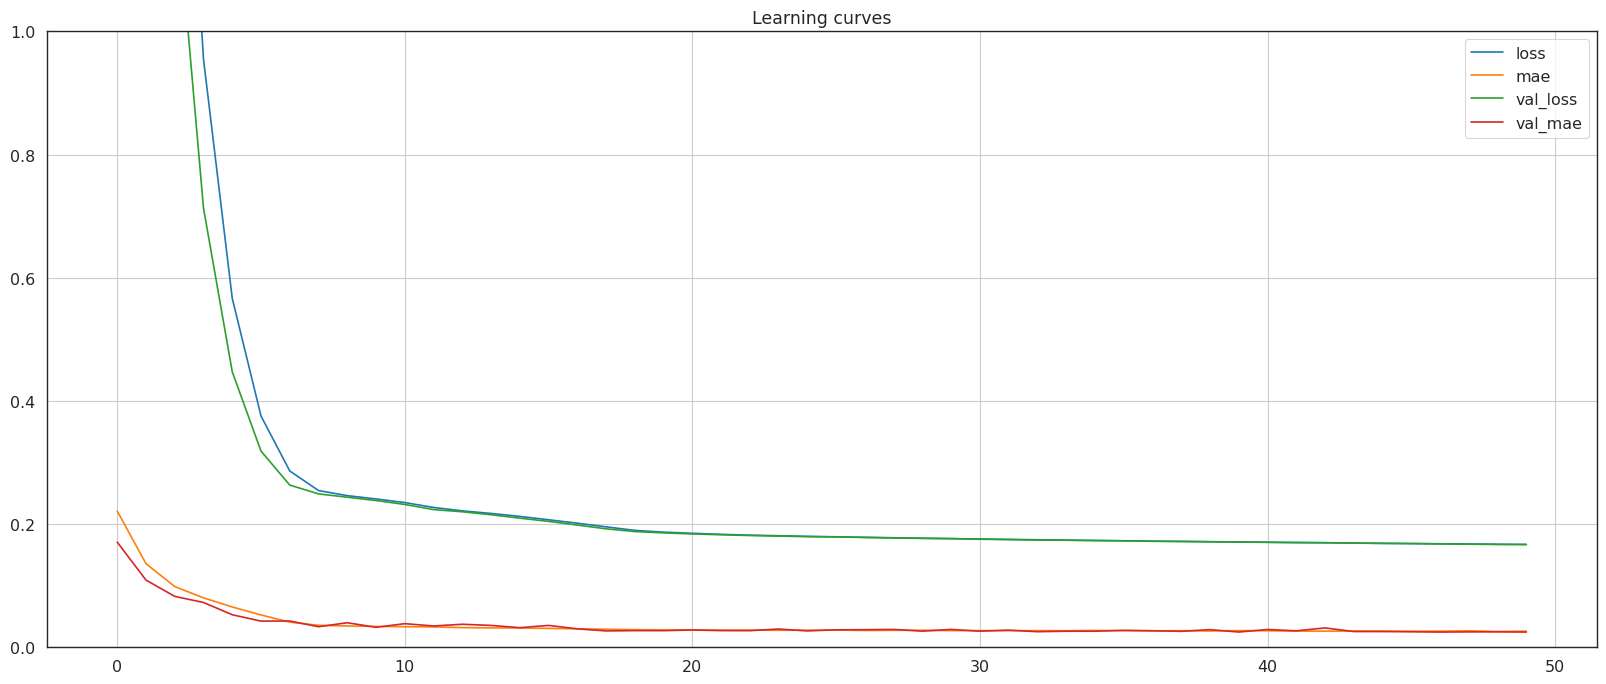

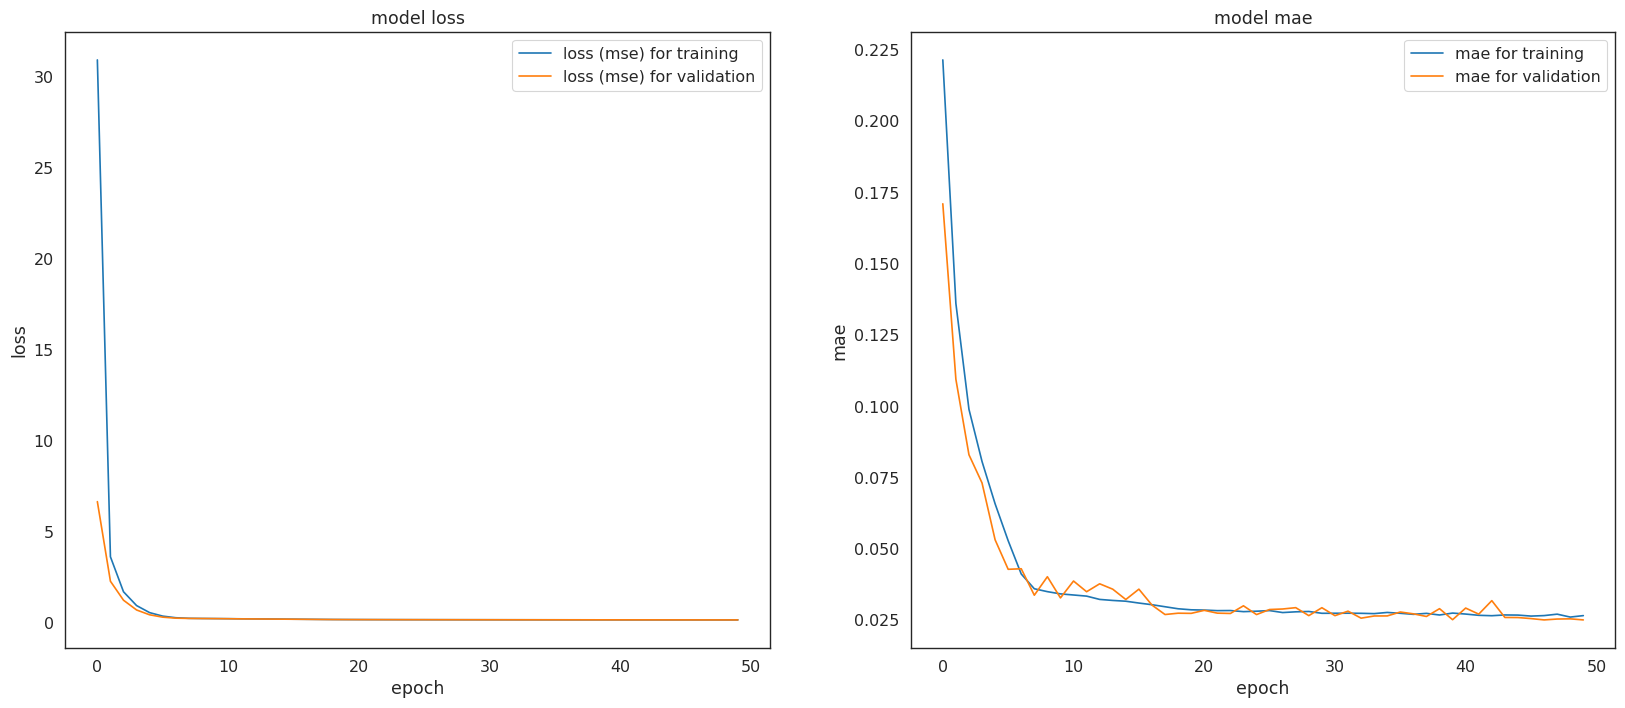

In [ ]:
# Basic model with three fully connected layers
# + Increasing validation_split to 0.4
# + Adding two additional layers
# + Increasing the number of neurons in the hidden layers
# + Changing the activation function
# + Changing the optimization function
# + Increasing the number of training epochs
# + Applying an early stopping and saving the best model
# + Applying L1 and L2 regularization

RegularizedDense = partial(tf.keras.layers.Dense,
                           activation="relu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l1_l2(0.01))

model_1i = Sequential([
    RegularizedDense(128, input_shape=(6,)),
    RegularizedDense(256),
    RegularizedDense(128),
    RegularizedDense(64),
    Dense(1, activation='linear')
])

model_1i.compile(optimizer='Adam',
                 loss='mse',
                 metrics=['mae'])

model_1i.summary()

tf.keras.utils.plot_model(model_1i, to_file='model_1i.png')

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("model_1i.h5",
                                                   save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=3,
                                                     restore_best_weights=True)

history_1i = model_1i.fit(X_train_norm, y_train,
                          epochs=50,
                          batch_size=128,
                          verbose=2,
                          validation_split=0.4,
                          callbacks=[checkpoint_cb, early_stopping_cb])
# Learning curves
learning_curves(history_1i)

# Evaluation model
evaluation_model(history_1i)

ERRORS OF LSTM

Train Mean Absolute Error: 0.11300897379522322

Train Root Mean Squared Error: 0.2675198107922456

Test Mean Absolute Error: 0.09919553908012968

Test Root Mean Squared Error: 0.22213141752398086

SIMPLE ANN

loss: 0.1664

mae: 0.0264

val_loss: 0.1662
   
val_mae: 0.0285



loss: 0.1705 - mae: 0.0267 - val_loss: 0.1705 - val_mae: 0.0264


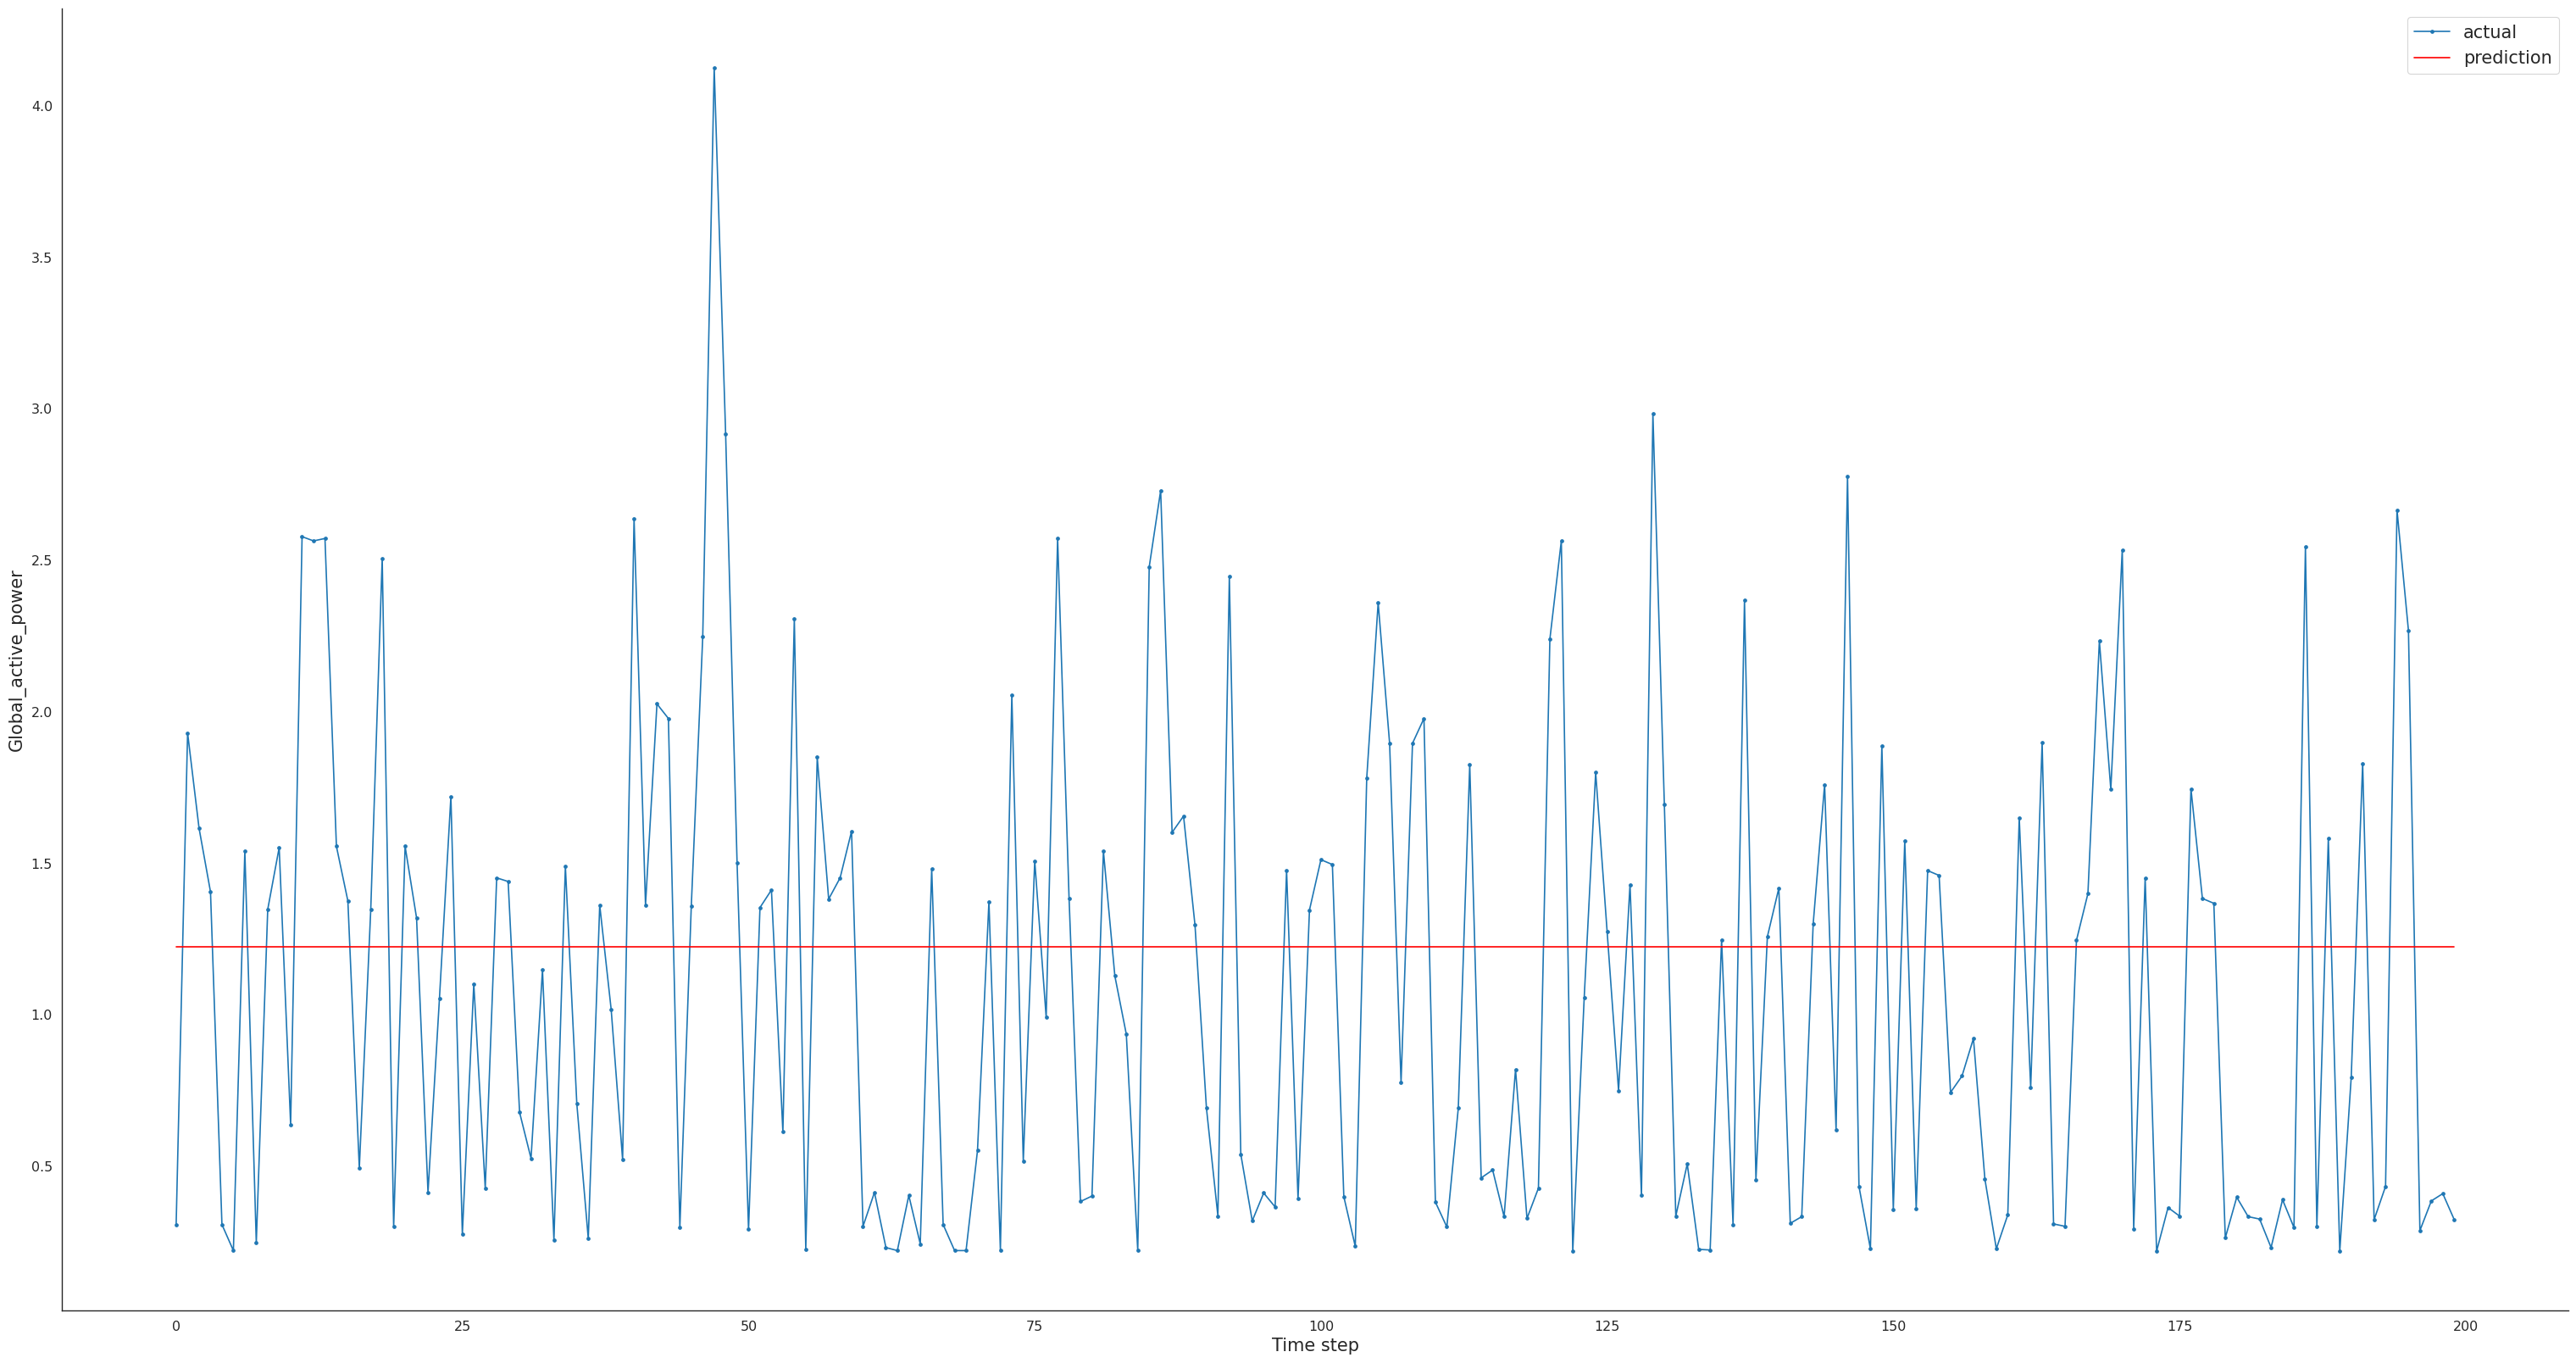

In [ ]:

aa=[x for x in range(200)]
plt.figure(figsize=(32,16))
plt.plot(aa, y_test[:][:200], marker='.', label="actual")
plt.plot(aa, test_set_predictions[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

RANDOM FOREST

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(a,b, test_size=0.3, random_state=1)

rf_regressor = RandomForestRegressor(n_estimators = 500 ,  random_state = 1)
history= rf_regressor.fit(x_train,y_train)

#Prediction using test set
y_pred = rf_regressor.predict(x_test)


error = mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

print(error)

print('mse: %.3f' % error)

0.748765969260474
mse: 0.749


In [ ]:
#plot model losses
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();



AttributeError: ignored

<Figure size 800x400 with 0 Axes>

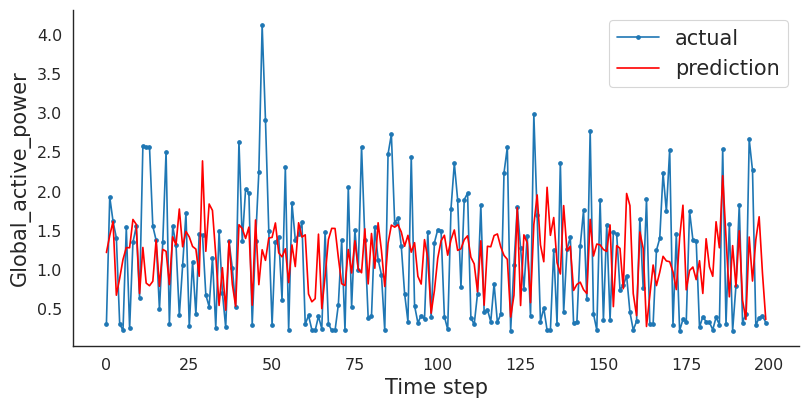

In [ ]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, y_test[:][:200], marker='.', label="actual")
plt.plot(aa, y_pred[:][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

SUPPORT VECTOR


In [ ]:
a = df[ 0:int(.1*len(df))]

b = df[ int(.9*len(df)): -1]

#np.split(df, [int(.7*len(df)), int(len(df))])

In [ ]:

import numpy as np
import pandas as pd
import requests
from sklearn import metrics
import matplotlib.pyplot as plt


data=np.array(df)


x_train, x_test, y_train, y_test=train_test_split(a,b, test_size=0.3, random_state=1)

n=data.shape[0]
d=data.shape[1]

#normalized_data=np.zeros((n,d))

#for i in range(n):
#  for j in range(d):
#    normalized_data[i,j]=2*((data[i,j]-np.min(data[:,j]))/(np.max(data[:,j])-np.min(data[:,j])))-1

new_set= pd.DataFrame(data, columns = df.columns)

#training_set=new_set.iloc[0:150]
#test_set=new_set.iloc[150:]

#x_test=test_set.iloc[:,:8].values
#y_test=test_set.iloc[:,-1].values
#x_train=training_set.iloc[:,:8].values
#y_train=training_set.iloc[:,-1].values

def backnorm(x):
  backnormOutput=(x+1)/2*(np.max(data[:,-1]-np.min(data[:,-1])))+np.min(data[:,-1])

  return backnormOutput


from sklearn.svm import SVR
regressor= SVR(kernel='rbf')
regressor.fit(x_train,y_train)
y_pred_test=regressor.predict(x_test)

y_pred_train = regressor.predict(x_train)

model_testpredictions = backnorm(y_pred_test)
model_trainpredictions= backnorm(y_pred_train)
actual_testset_values = backnorm(y_test)
actual_trainingset_values= backnorm(y_train)


msetest=metrics.mean_squared_error(actual_testset_values, model_testpredictions)

print('Suppport Vector Regression Accuracy: ', regressor.score(x_test,y_test))
print('Test MSE: ', msetest)

msetrain=metrics.mean_squared_error(actual_trainingset_values, model_trainpredictions)

print('Train MSE: ', msetrain)




Suppport Vector Regression Accuracy:  -0.0038874413276566155
Test MSE:  2277403873.1335964
Train MSE:  2370748136.1024876


In [ ]:
model_testpredictions

array([105820.13085067, 106099.69041636, 106115.45146447, ...,
       105957.96693264, 106020.40161476, 106099.84803037])

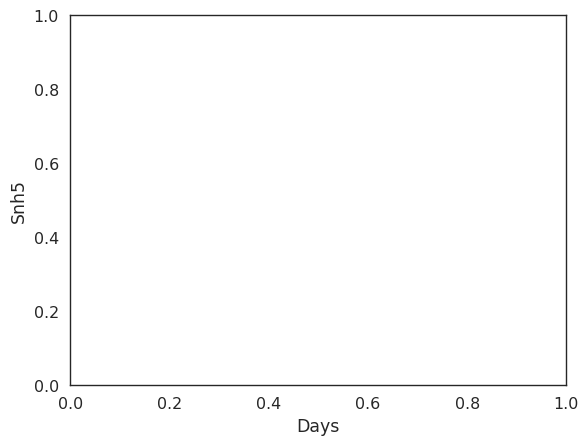

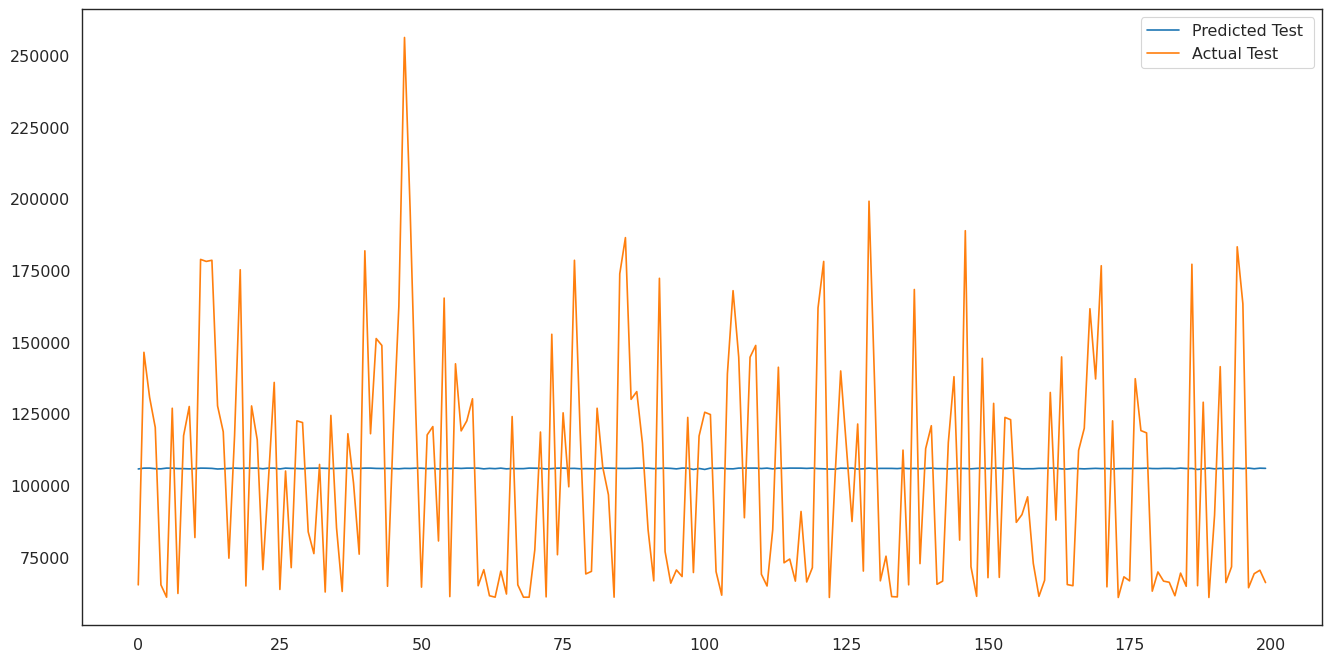

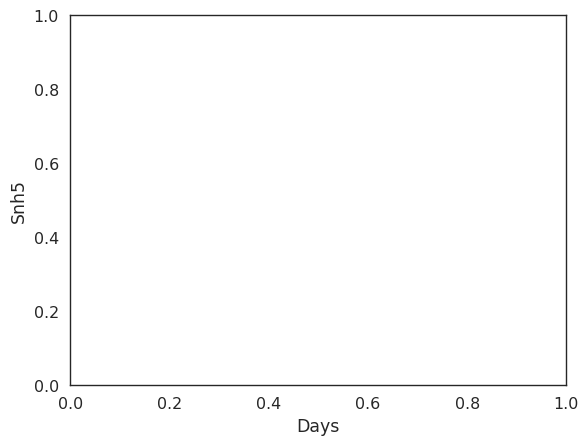

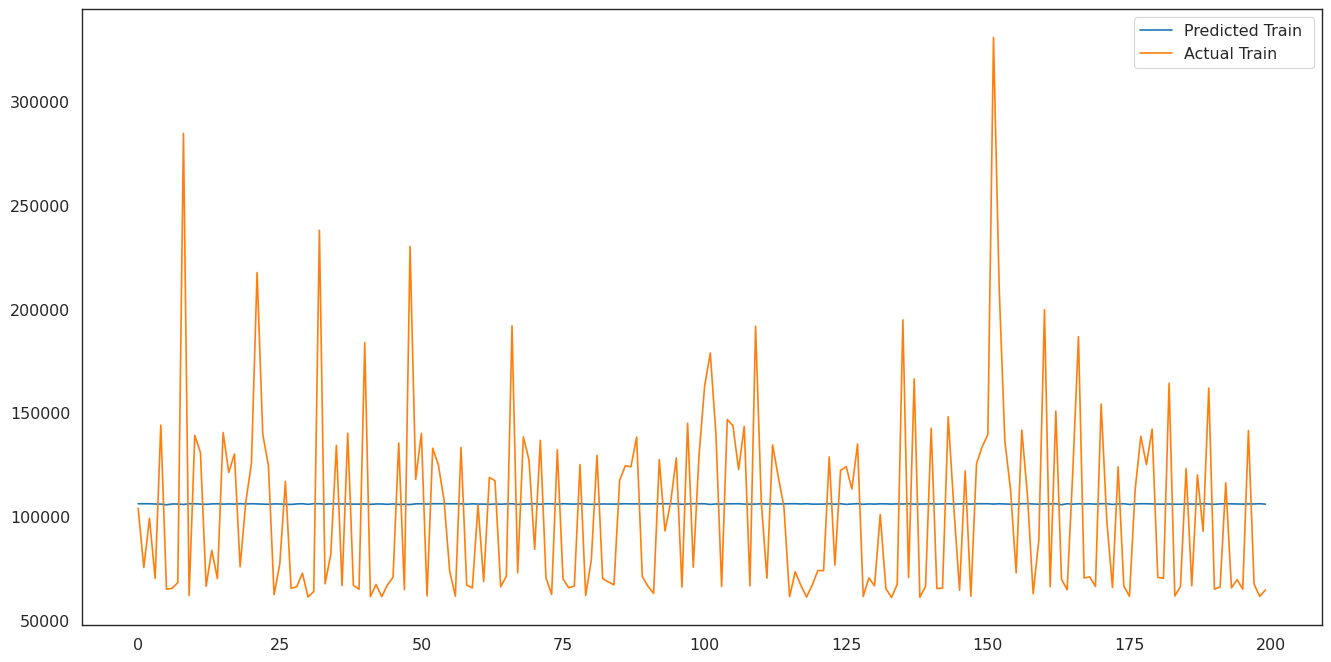

In [ ]:
aa=[x for x in range(200)]
fig,ax = plt.subplots()
plt.figure(figsize=(16,8))
plt.plot(aa,model_testpredictions[:][:200], label='Predicted Test ')
plt.plot(aa,actual_testset_values[:][:200], label='Actual Test')
ax.set_xlabel('Days')
ax.set_ylabel('Snh5')
plt.legend();
plt.show()

fig,ax = plt.subplots()
plt.figure(figsize=(16,8))
plt.plot(aa,model_trainpredictions[:][:200], label='Predicted Train ')
plt.plot(aa,actual_trainingset_values[:][:200], label='Actual Train ')
ax.set_xlabel('Days')
ax.set_ylabel('Snh5')
plt.legend();
plt.show()




TUSE RNN


In [ ]:
import numpy as np
import pandas as pd
import requests
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics
import keras.backend as K

In [ ]:

data=np.array(df)

data_clear = df.dropna()

X = df.drop("Global_active_power", axis=1)

y = df["Global_active_power"].reset_index(drop=True)

x_train.isna().sum()
x_test.isna().sum()
y_train.isna().sum()
y_test.isna().sum()

# Drop missing values
x_train = x_train.dropna()
x_test = x_test.dropna()
y_train = y_train.dropna()
y_test = y_test.dropna()

In [ ]:
n=data.shape[0]
d=data.shape[1]

#normalized_data=np.zeros((n,d))

#for i in range(n):
#  for j in range(d):
 #   normalized_data[i,j]=2*((data[i,j]-np.min(data[:,j]))/(np.max(data[:,j])-np.min(data[:,j])))-1



In [ ]:
new_set= pd.DataFrame(data, columns = df.columns)

training_set=new_set.iloc[0:int(len(df)*0.7)]
test_set=new_set.iloc[int(len(df)*0.7):-1]


#deltaSnh=df.iloc[679:824,-1].values
#ro3eksik=df.iloc[679:824,-8].values

def backnorm(x):
  backnormOutput=(x+1)/2*(np.max(data[:,-1]-np.min(data[:,-1])))+np.min(data[:,-1])

  return backnormOutput


In [ ]:
def create_data_sequence(X, y, time_steps=1):

    input_sequence, output = [], []
    for i in range(len(X) - time_steps):
        sequence = X.iloc[i:(i + time_steps)].values
        input_sequence.append(sequence)
        output.append(y.iloc[i + time_steps])
    return np.array(input_sequence), np.array(output)

time_steps = 5

In [ ]:
training_set_sequence, training_set_output = create_data_sequence(training_set, training_set.Global_active_power, time_steps)
test_set_sequence, test_set_output = create_data_sequence(test_set, test_set.Global_active_power, time_steps)


In [ ]:
model = keras.Sequential()
model.add(keras.layers.SimpleRNN(units=25,activation='tanh',return_sequences=True,input_shape=(training_set_sequence.shape[1], training_set_sequence.shape[2])))
model.add(keras.layers.SimpleRNN(units=25,activation='tanh',return_sequences=False))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mse', optimizer='Adam', run_eagerly=True)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 5, 25)             675       
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 25)                1275      
                                                                 
 dense_10 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1,976
Trainable params: 1,976
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

history = model.fit(
        training_set_sequence,
        np.hstack((training_set_output.reshape((1452676,1)))),
        epochs=20,
        batch_size=5000,  # increasing the batch size decreases the itterations in each epoch
        shuffle=False,
        callbacks=[es])

Epoch 1/20
291/291 [==============================] - 33s 114ms/step - loss: 57434360.0000
Epoch 2/20
291/291 [==============================] - 31s 106ms/step - loss: 57431904.0000
Epoch 3/20
291/291 [==============================] - 31s 108ms/step - loss: 57430468.0000
Epoch 4/20
291/291 [==============================] - 32s 109ms/step - loss: 57429236.0000
Epoch 5/20
291/291 [==============================] - 31s 107ms/step - loss: 57428112.0000
Epoch 6/20
291/291 [==============================] - 31s 106ms/step - loss: 57427032.0000
Epoch 7/20
291/291 [==============================] - 31s 106ms/step - loss: 57426056.0000
Epoch 8/20
291/291 [==============================] - 31s 106ms/step - loss: 57425092.0000
Epoch 9/20
291/291 [==============================] - 32s 110ms/step - loss: 57424180.0000
Epoch 10/20
291/291 [==============================] - 31s 106ms/step - loss: 57423236.0000
Epoch 11/20
291/291 [==============================] - 31s 106ms/step - loss: 57422336.00

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.LSTM(units=25,activation='tanh',return_sequences=True,input_shape=(training_set_sequence.shape[1], training_set_sequence.shape[2])))
model2.add(keras.layers.LSTM(units=25,activation='tanh',return_sequences=False))
model2.add(keras.layers.Dense(units=1))
model2.compile(loss='mse', optimizer='Adam', run_eagerly=True)
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 25)             2700      
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense_11 (Dense)            (None, 1)                 26        
                                                                 
Total params: 7,826
Trainable params: 7,826
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(
        training_set_sequence,
        np.hstack((training_set_output.reshape((1452676,1)))),
        epochs=100,
        batch_size=25,
        shuffle=False,
        callbacks=[es])

Epoch 1/100
   57/58108 [..............................] - ETA: 1:18:31 - loss: 3.0603

KeyboardInterrupt: ignored

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.GRU(units=25,activation='tanh',return_sequences=True,input_shape=(training_set_sequence.shape[1], training_set_sequence.shape[2])))
model3.add(keras.layers.GRU(units=25,activation='tanh',return_sequences=False))
model3.add(keras.layers.Dense(units=1))
model3.compile(loss=custom_loss_function, optimizer='Adam', run_eagerly=True)
model3.summary()

In [ ]:
history3 = model3.fit(
        training_set_sequence,
        np.hstack((training_set_output.reshape((145,1)))),
        epochs=100,
        batch_size=25,
        shuffle=False,
        callbacks=[es])


In [ ]:
test_set_predictions = model.predict(test_set_sequence)

model_predictions = backnorm(test_set_predictions)
actual_testset_values = backnorm(test_set_output)

mse=metrics.mean_squared_error(actual_testset_values, model_predictions)
print('SimpleRNN:Test MSE: ', mse)

train_set_predictions = model.predict(training_set_sequence)

model_trainpredictions= backnorm(train_set_predictions)
actual_trainingset_values = backnorm(training_set_output)

mse=metrics.mean_squared_error(actual_trainingset_values, model_trainpredictions)
print('SimpleRNN:Train MSE: ', mse)

test_set_predictions2 = model2.predict(test_set_sequence)

model2_predictions = backnorm(test_set_predictions2)

mse=metrics.mean_squared_error(actual_testset_values, model2_predictions)
print('LSTM:Test MSE: ', mse)

train_set_predictions2 = model2.predict(training_set_sequence)

model2_trainpredictions= backnorm(train_set_predictions2)

mse=metrics.mean_squared_error(actual_trainingset_values, model2_trainpredictions)
print('LSTM:Train MSE: ', mse)

test_set_predictions3 = model3.predict(test_set_sequence)

model3_predictions = backnorm(test_set_predictions3)

mse=metrics.mean_squared_error(actual_testset_values, model3_predictions)
print('GRU:Test MSE: ', mse)

train_set_predictions3 = model3.predict(training_set_sequence)

model3_trainpredictions= backnorm(train_set_predictions3)

mse=metrics.mean_squared_error(actual_trainingset_values, model3_trainpredictions)
print('GRU:Train MSE: ', mse)

In [ ]:
fig,ax = plt.subplots()
x=df['t']
plt.plot(x[679:824,],model_trainpredictions, label='Simple RNN:Predicted Train Snh5')
plt.plot(x[679:824,],model2_trainpredictions, label='LSTM:Predicted Train Snh5')
plt.plot(x[679:824,],model3_trainpredictions, label='GRU:Predicted Train Snh5')
plt.plot(x[679:824,],actual_trainingset_values, label='Actual Train Snh5')
ax.set_xlabel('Days')
ax.set_ylabel('Snh5')
plt.legend();
plt.show()

fig,ax = plt.subplots()
x=df['t']
plt.plot(x[824:919,],model_predictions, label='Simple RNN:Predicted Test Snh5')
plt.plot(x[824:919,],model2_predictions, label='LSTM:Predicted Test Snh5')
plt.plot(x[824:919,],model3_predictions, label='GRU:Predicted Test Snh5')
plt.plot(x[824:919,],actual_testset_values, label='Actual Test Snh5')
ax.set_xlabel('Days')
ax.set_ylabel('Snh5')
plt.legend();

Grid Search

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import requests
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

tf.config.run_functions_eagerly(True)
tf.data.experimental.enable_debug_mode()
tf.autograph.experimental.do_not_convert



data=np.array(df)

n=data.shape[0]
d=data.shape[1]

#normalized_data=np.zeros((n,d))

#for i in range(n):
#  for j in range(d):
#    normalized_data[i,j]=2*((data[i,j]-np.min(data[:,j]))/(np.max(data[:,j])-np.min(data[:,j])))-1

new_set= pd.DataFrame(normalized_data, columns = df.columns)

training_set=new_set.iloc[0:int(len(df)*0.7)]
test_set=new_set.iloc[int(len(df)*0.7):-1]


def backnorm(x):
  backnormOutput=(x+1)/2*(np.max(data[:,-1]-np.min(data[:,-1])))+np.min(data[:,-1])

  return backnormOutput

def create_data_sequence(X, y, time_steps=1):

    input_sequence, output = [], []
    for i in range(len(X) - time_steps):
        sequence = X.iloc[i:(i + time_steps)].values
        input_sequence.append(sequence)
        output.append(y.iloc[i + time_steps])
    return np.array(input_sequence), np.array(output)

def backnorm(x):
  backnormOutput=(x+1)/2*(np.max(data[:,-1]-np.min(data[:,-1])))+np.min(data[:,-1])

  return backnormOutput

def custom_loss_function(data, y_pred):

   y_true=data[:,None,0]

   squared_difference = tf.square((y_true - y_pred))
   mse = tf.reduce_mean(squared_difference, axis=-1)
   y_prednonscaled=backnorm(y_pred.numpy())
   phyloss3=tf.square(DeltaSnh+0.01042*(0.08+1/0.24)*Ro3eksik*y_prednonscaled/(1+y_prednonscaled))
   phyloss=tf.reduce_mean(phyloss3, axis=-1)

   return mse+0.0001*phyloss

def baseline_model(optimizer="adam",batch_size=25,epochs=10,neurons=25,activation="tanh",layers= 2,time_steps=5):

    training_set_sequence, training_set_output = create_data_sequence(training_set, training_set.Snh5, time_steps)
    test_set_sequence, test_set_output = create_data_sequence(test_set, test_set.Snh5, time_steps)

    model = Sequential()
    for i in range (layers):
        model.add(GRU(neurons,input_shape=(time_steps,training_set_sequence.shape[2]), activation="tanh",return_sequences=True))
    model.add(GRU(neurons,activation="tanh",return_sequences=False))
    model.add(Dense(1))

    model.compile("adam",loss=custom_loss_function)

    return model

from keras.models import Sequential, Model
from keras.layers import Dense, Input, GRU
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ParameterGrid

grid1 ={"num_layers": (1,2)}
grid2= {"neurons": (15,35)}

training_set_sequence, training_set_output = create_data_sequence(training_set, training_set.Snh5, 5)
test_set_sequence, test_set_output = create_data_sequence(test_set, test_set.Snh5, 5)
deltaSnh=df.iloc[679:824,-1].values
ro3eksik=df.iloc[679:824,-8].values

best_score=100

for c in [1,2]:
    for g in [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40]:

        time_steps=5
        model = Sequential()
        for i in range (c):
            model.add(GRU(g,input_shape=(time_steps,training_set_sequence.shape[2]), activation="tanh",return_sequences=True))
        model.add(GRU(g,activation="tanh",return_sequences=False))
        model.add(Dense(units=1))
        model.summary()

        model.compile(loss=custom_loss_function, optimizer='Adam')

        model.fit(
            training_set_sequence[0:70],
            np.hstack((training_set_output[0:70].reshape((70,1)),ro3eksik[0:70].reshape((70,1)),deltaSnh[0:70].reshape((70,1)))),
            validation_data=(training_set_sequence[70:],np.hstack((training_set_output[70:].reshape((80-time_steps,1)),ro3eksik[70:].reshape((80-time_steps,1)),deltaSnh[70:].reshape((80-time_steps,1))))),
            epochs=10,
            batch_size=25,
            shuffle=False)

        test_set_predictions = model.predict(training_set_sequence[70:])

        mse1=metrics.mean_squared_error(training_set_output[70:], test_set_predictions)

        model2 = Sequential()
        for i in range (c):
            model2.add(GRU(g,input_shape=(time_steps,training_set_sequence.shape[2]), activation="tanh",return_sequences=True))
        model2.add(GRU(g,activation="tanh",return_sequences=False))
        model2.add(Dense(units=1))
        model2.summary()

        model2.compile(loss=custom_loss_function, optimizer='Adam')

        model2.fit(
            training_set_sequence[70:],
            np.hstack((training_set_output[70:].reshape((80-time_steps,1)),ro3eksik[70:].reshape((80-time_steps,1)),deltaSnh[70:].reshape((80-time_steps,1)))),
            validation_data=(training_set_sequence[0:70],np.hstack((training_set_output[0:70].reshape((70,1)),ro3eksik[0:70].reshape((70,1)),deltaSnh[0:70].reshape((70,1))))),
            epochs=10,
            batch_size=25,
            shuffle=False)

        model2.compile(loss=custom_loss_function, optimizer='Adam')

        test_set_predictions2 = model2.predict(training_set_sequence[0:70])

        mse2=metrics.mean_squared_error(training_set_output[0:70], test_set_predictions2)

        validationerrors=mse1+mse2
        result=(validationerrors/2)
        # save if best
        if  result < best_score:
            best_score = result
            best_grid = {c,g}

es=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

modelf=Sequential()
for i in range (c):
    modelf.add(GRU(units=g,activation='tanh',return_sequences=True,input_shape=(5,training_set_sequence.shape[2])))

modelf.add(GRU(units=g,activation='tanh',return_sequences=False))
modelf.add(Dense(1))

modelf.compile(optimizer='adam',loss=custom_loss_function)
modelf.fit(training_set_sequence,np.hstack((training_set_output.reshape((145,1)),ro3eksik.reshape((145,1)),deltaSnh.reshape((145,1)))),shuffle=False,batch_size=25,epochs=20,callbacks=[es])

y_predtrain= modelf.predict(training_set_sequence)
model_trainprediction=backnorm(y_predtrain)
actual_trainset_values=backnorm(training_set_output)
y_predtest = modelf.predict(test_set_sequence)
model_testprediction=backnorm(y_predtest)
actual_testset_values=backnorm(test_set_output)

mse = mean_squared_error(model_trainprediction, actual_trainset_values)
print('Train MSE: ', mse)

mse = mean_squared_error(model_testprediction, actual_testset_values)
print('Test MSE: ', mse)

fig,ax = plt.subplots()
x=df['t']
plt.plot(x[674+5:824,],model_trainprediction, label='Predicted Train Snh5')
plt.plot(x[674+5:824,],actual_trainset_values, label='Actual Train Snh5')
ax.set_xlabel('Days')
ax.set_ylabel('Snh5')
plt.legend();

fig,ax = plt.subplots()
x=df['t']
plt.plot(x[824:924-5,],model_testprediction, label='Predicted Test Snh5')
plt.plot(x[824:924-5,],actual_testset_values, label='Actual Test Snh5')
ax.set_xlabel('Days')
ax.set_ylabel('Snh5')
plt.legend();

print ("MSE:",  best_score)
print ("Grid:", best_grid)